0
Early stopping at epoch 378


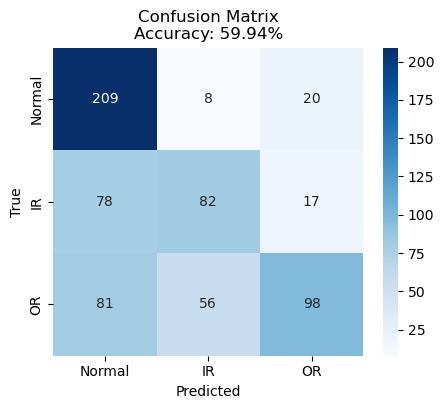

 - Model accuracy: 59.94%


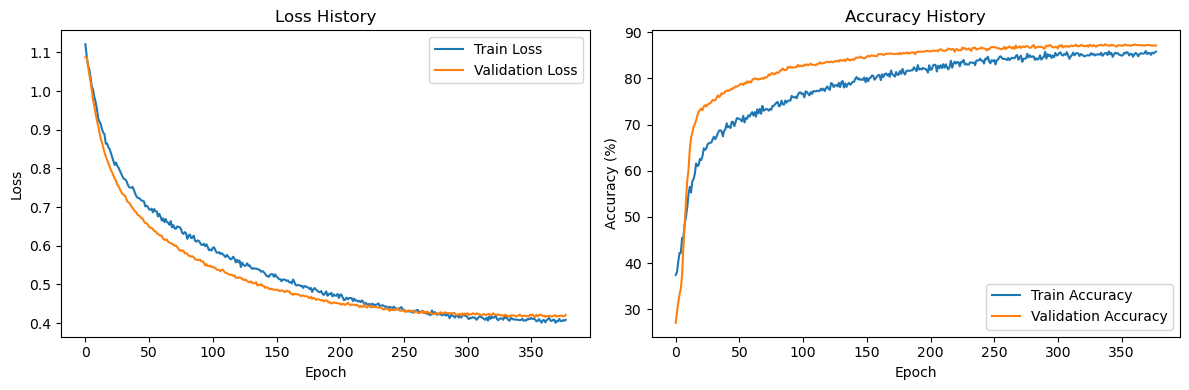

0
Early stopping at epoch 95


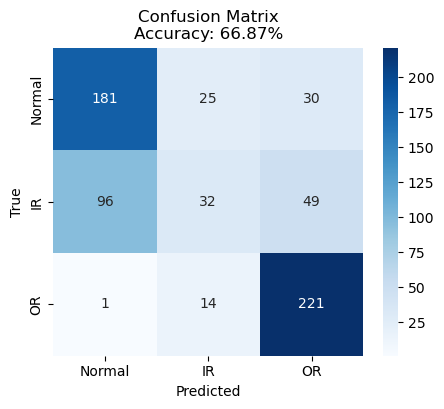

 - Model accuracy: 66.87%


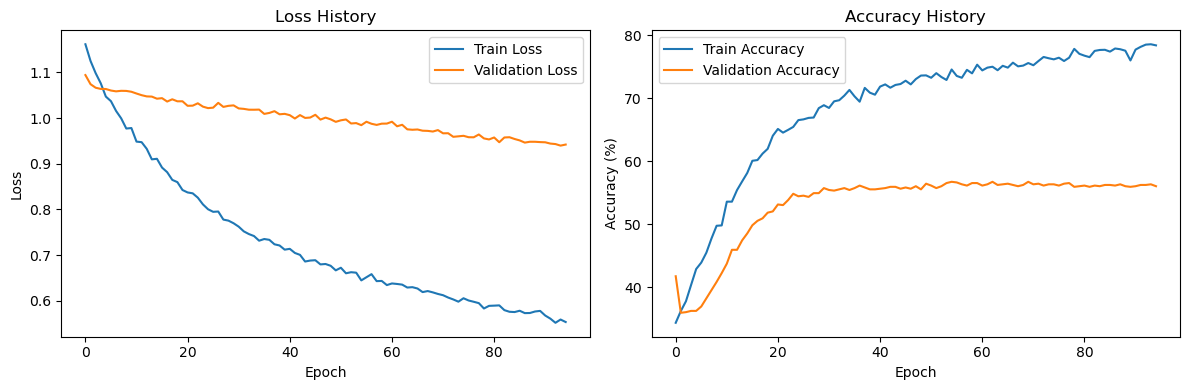

0
Early stopping at epoch 345


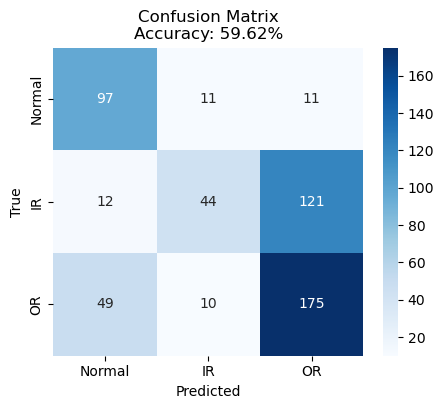

 - Model accuracy: 59.62%


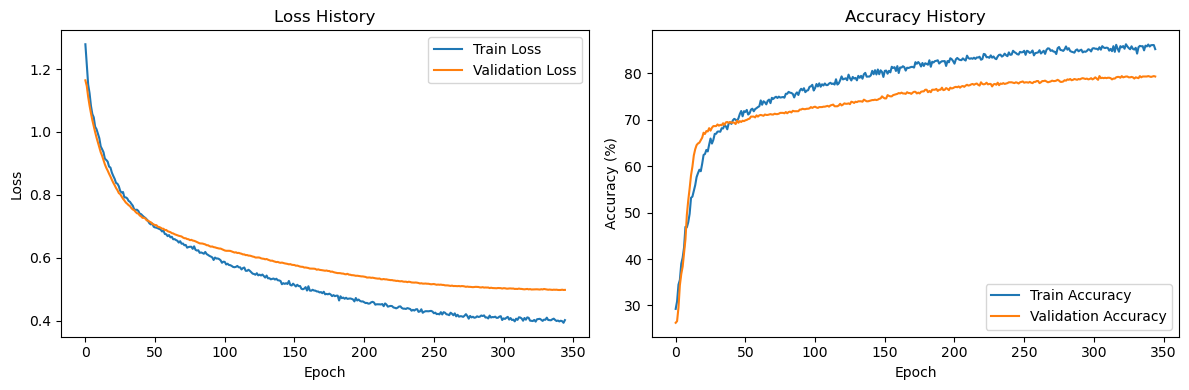

0
Early stopping at epoch 266


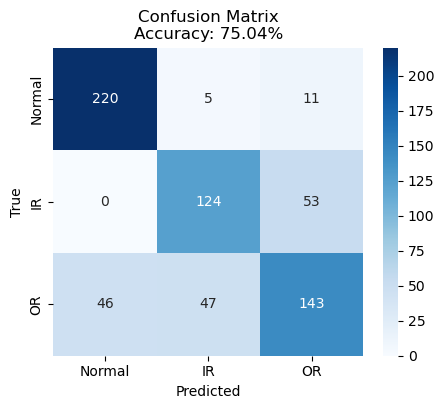

 - Model accuracy: 75.04%


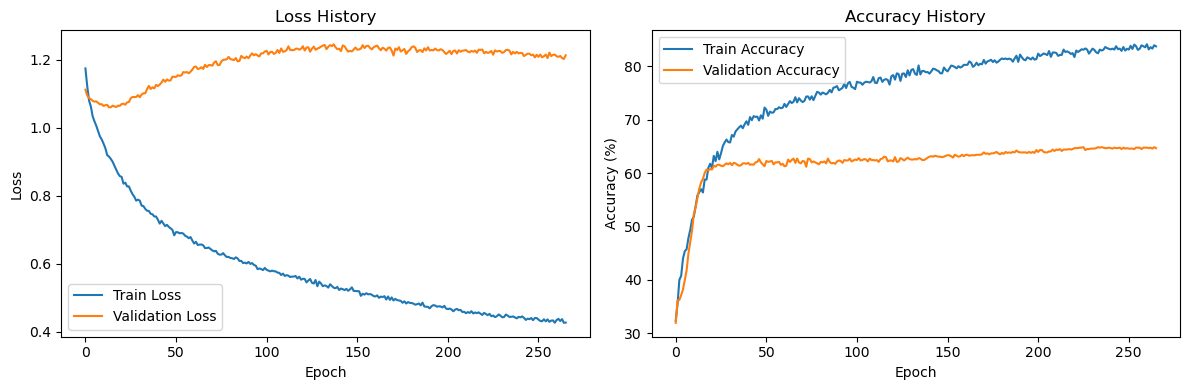

0
Early stopping at epoch 61


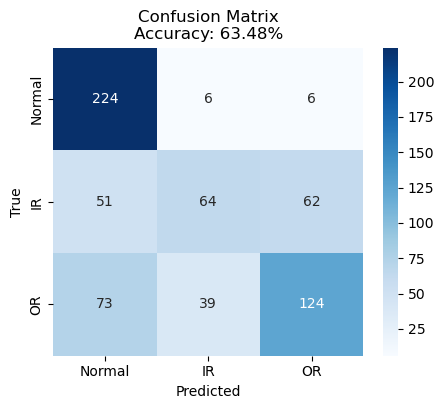

 - Model accuracy: 63.48%


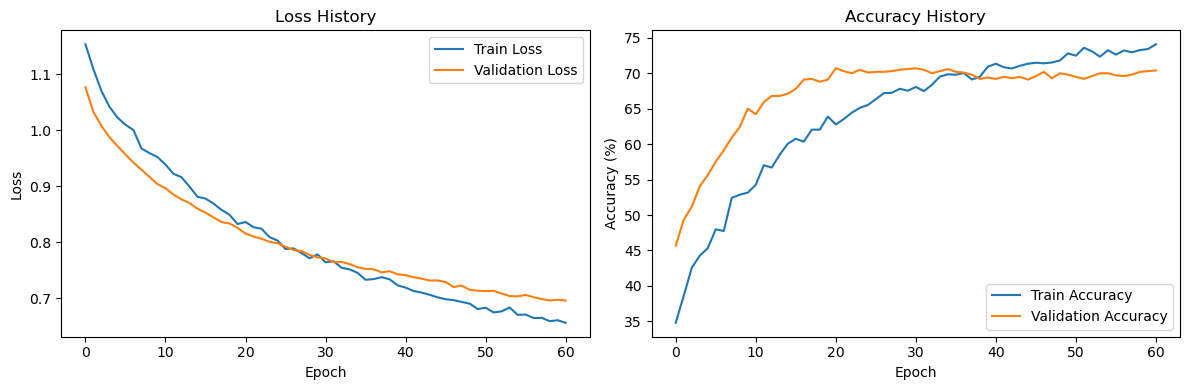

0
Early stopping at epoch 385


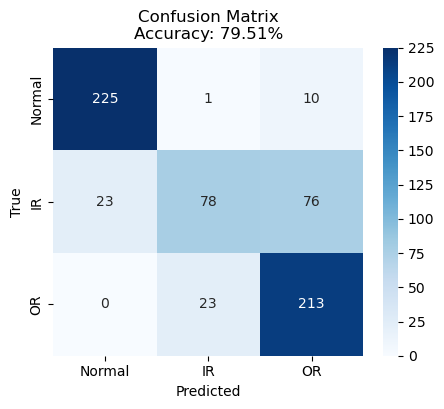

 - Model accuracy: 79.51%


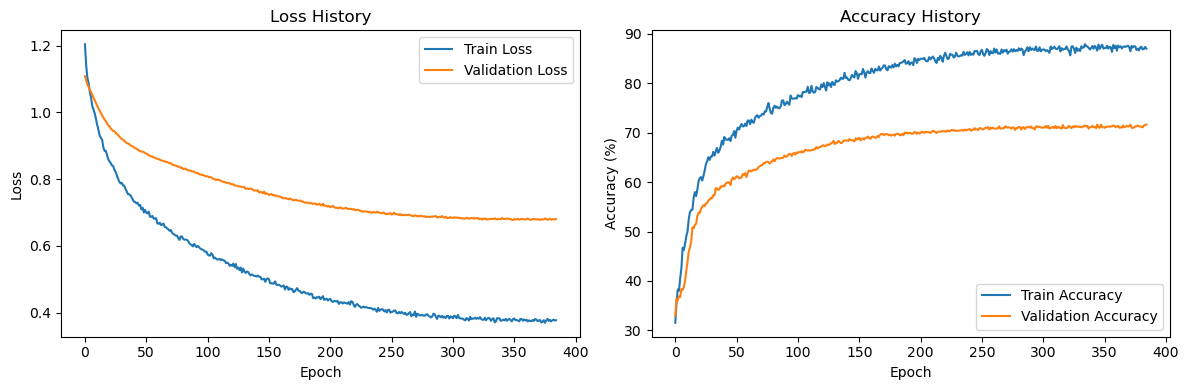

0
Early stopping at epoch 326


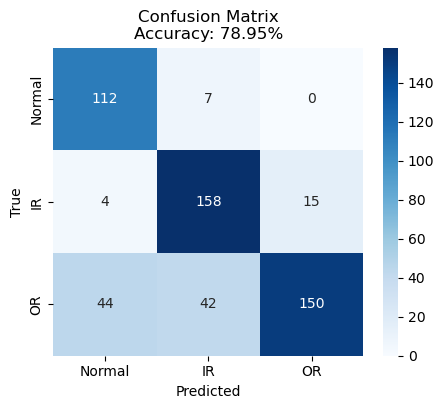

 - Model accuracy: 78.95%


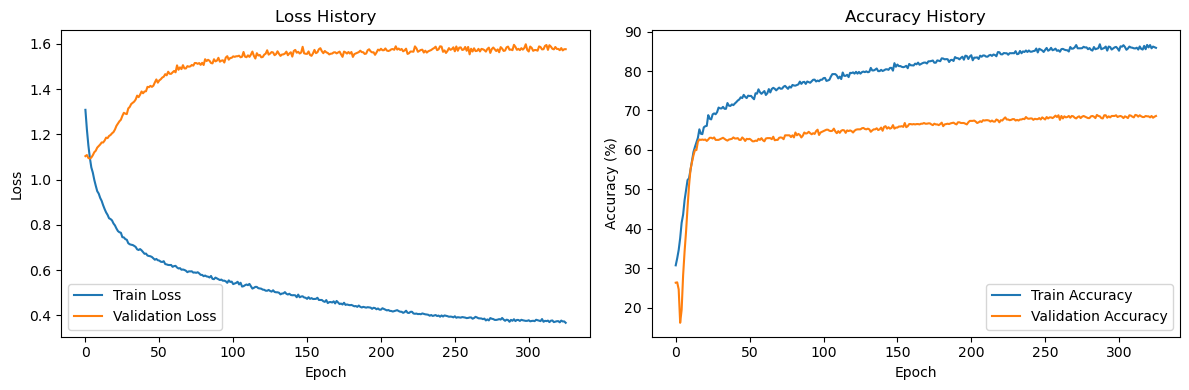

0
Early stopping at epoch 248


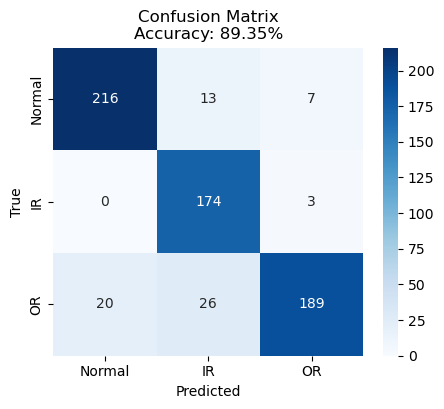

 - Model accuracy: 89.35%


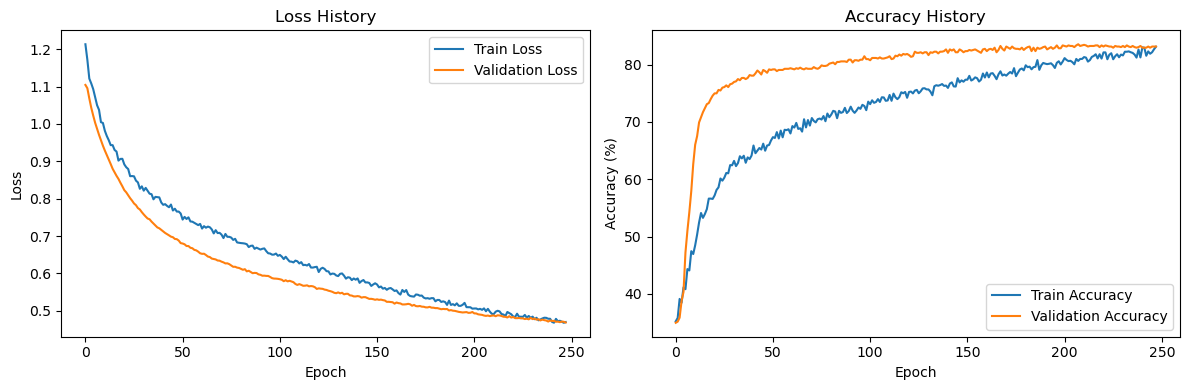

0
Early stopping at epoch 362


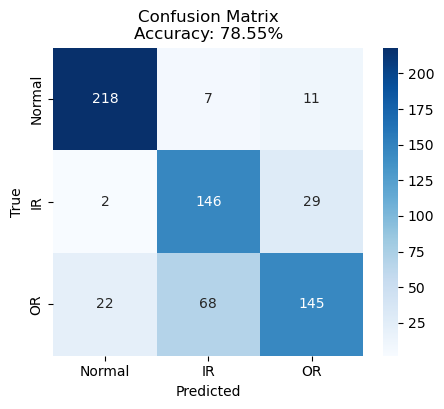

 - Model accuracy: 78.55%


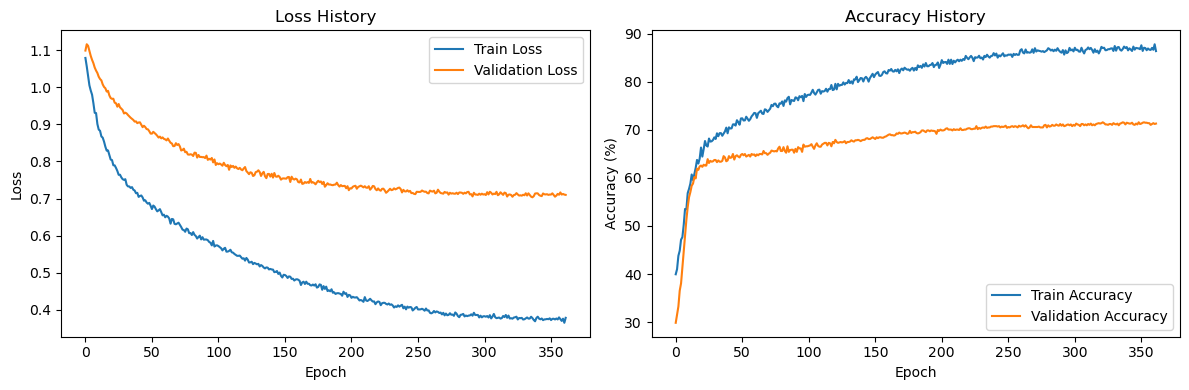

0
Early stopping at epoch 316


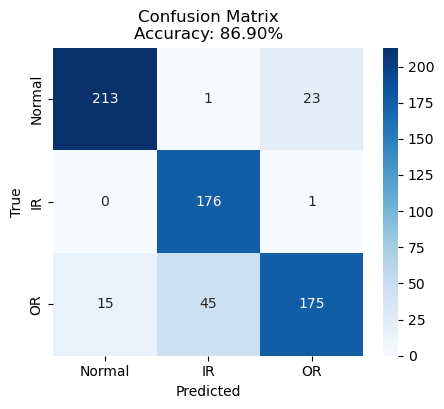

 - Model accuracy: 86.90%


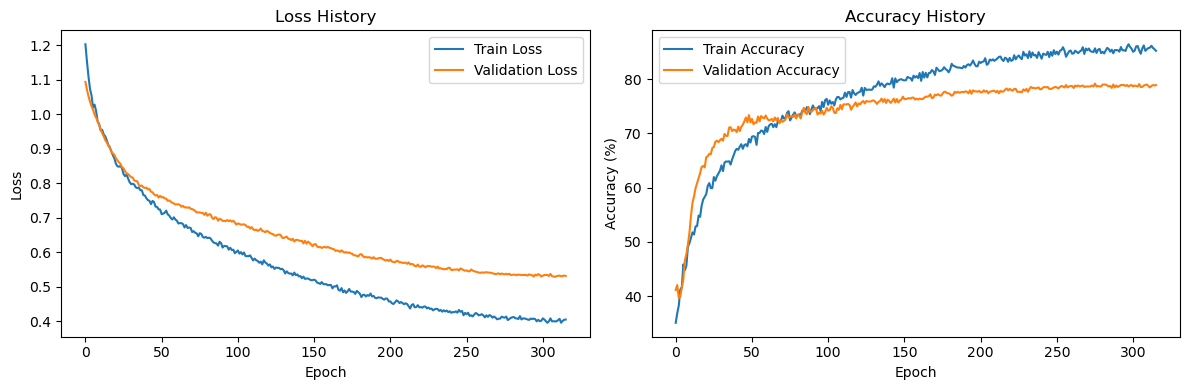

0
Early stopping at epoch 132


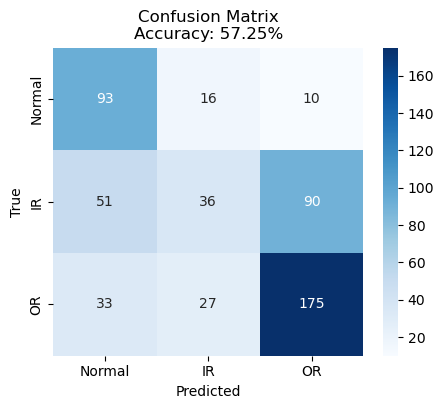

 - Model accuracy: 57.25%


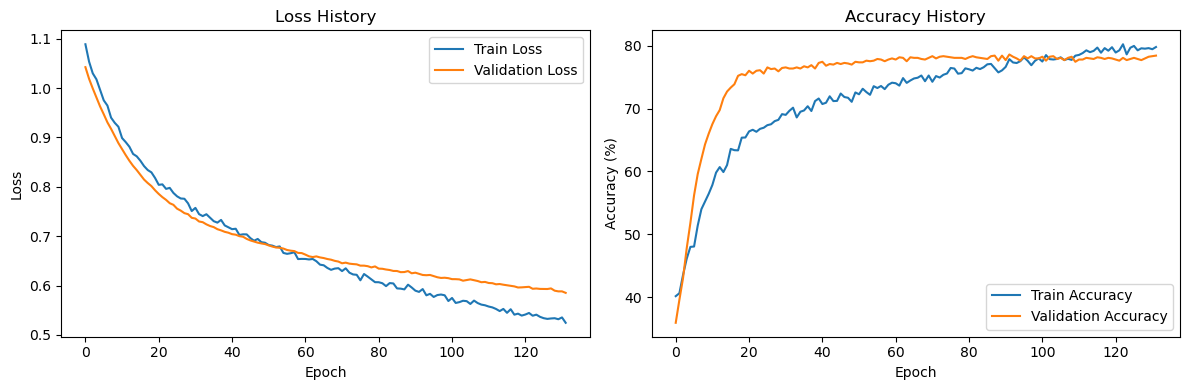

0
Early stopping at epoch 383


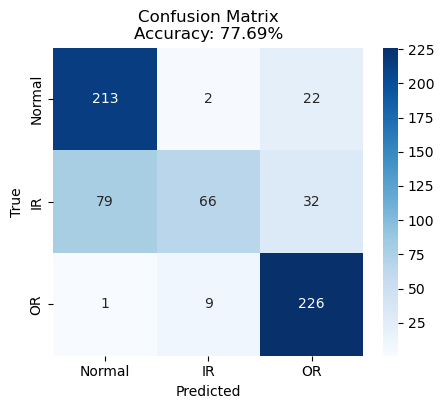

 - Model accuracy: 77.69%


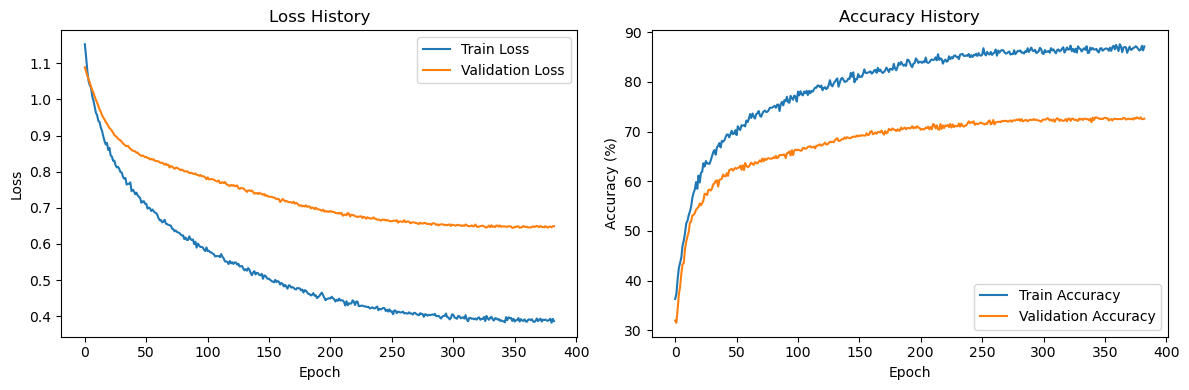

0
Early stopping at epoch 265


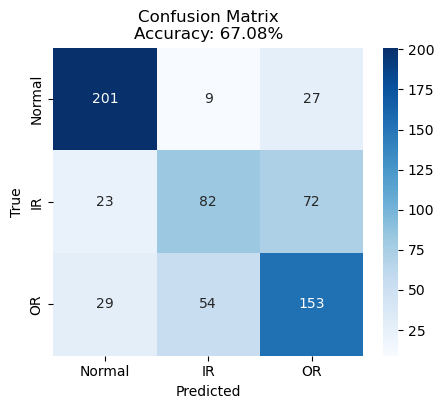

 - Model accuracy: 67.08%


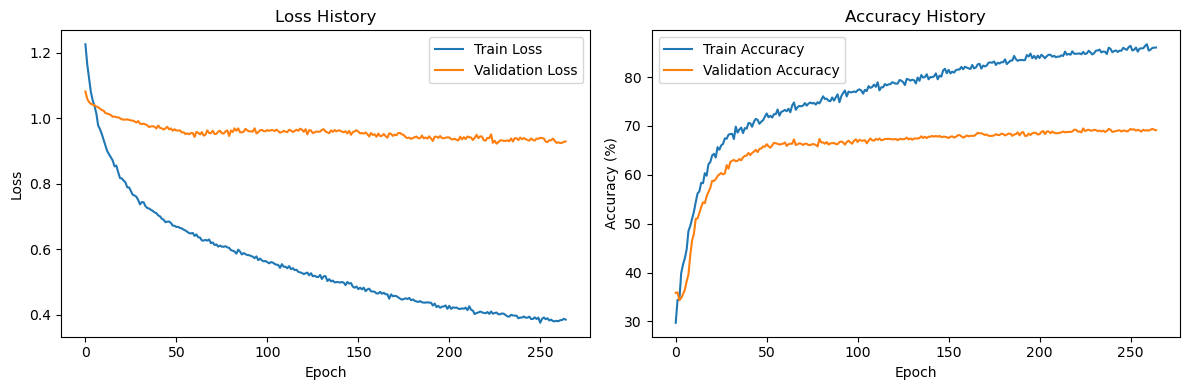

0
Early stopping at epoch 400


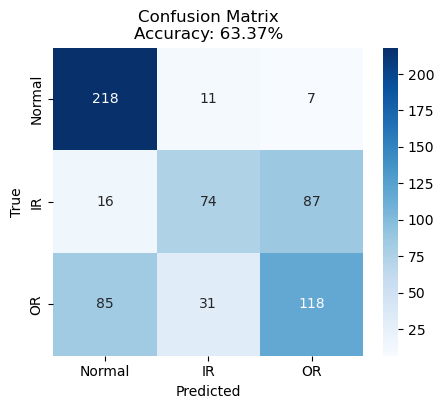

 - Model accuracy: 63.37%


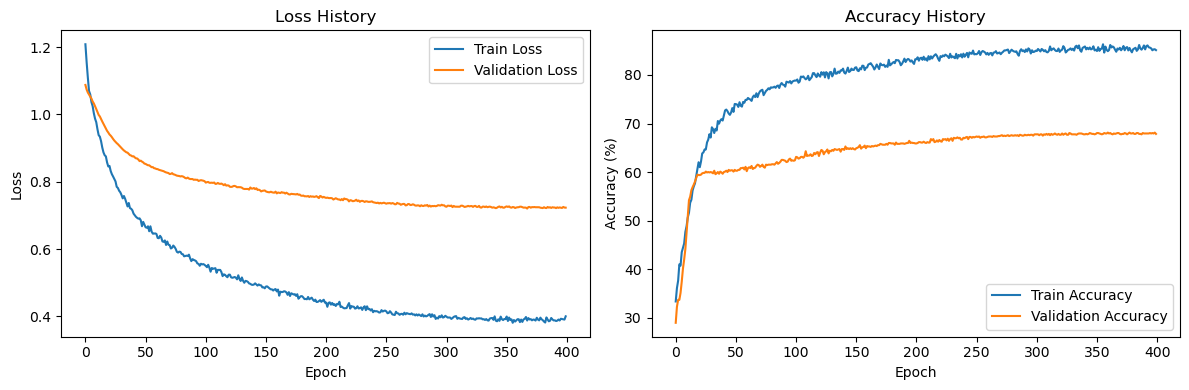

0
Early stopping at epoch 242


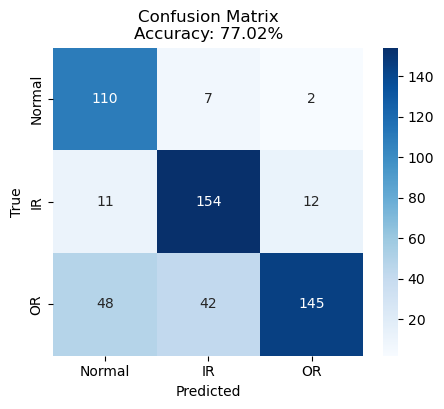

 - Model accuracy: 77.02%


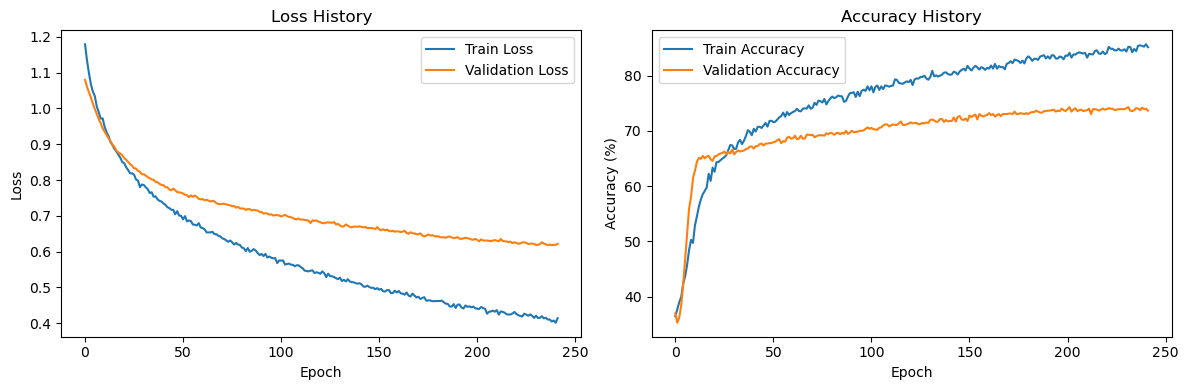

0
Early stopping at epoch 363


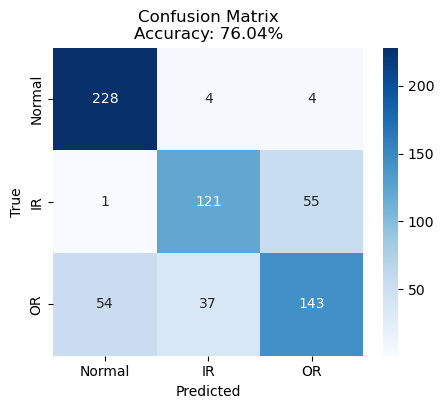

 - Model accuracy: 76.04%


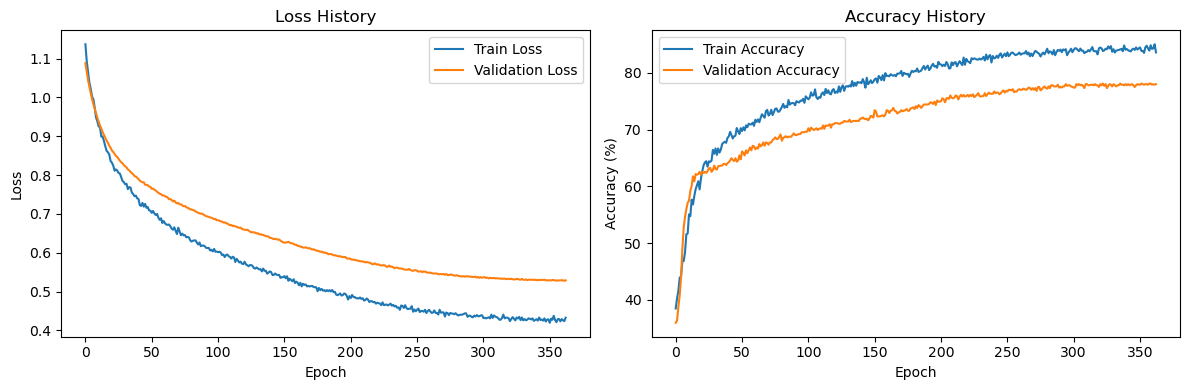

0
Early stopping at epoch 391


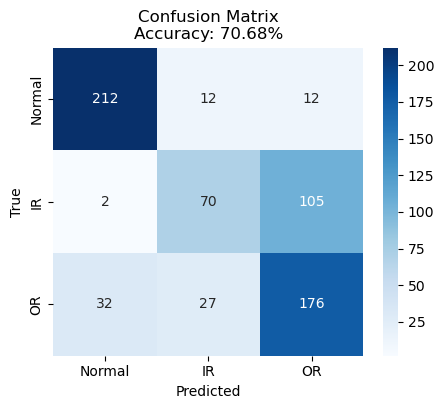

 - Model accuracy: 70.68%


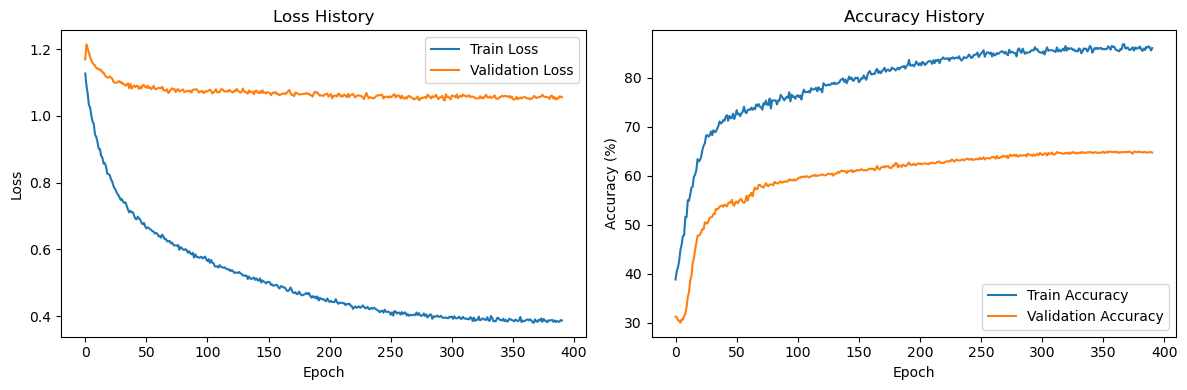

0
Early stopping at epoch 320


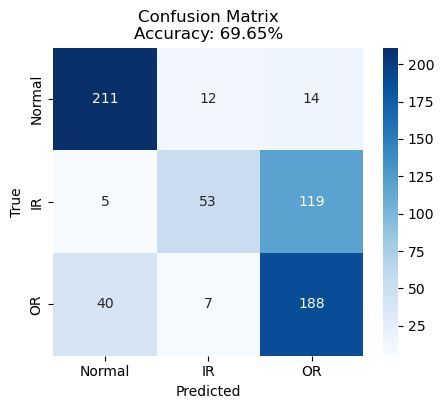

 - Model accuracy: 69.65%


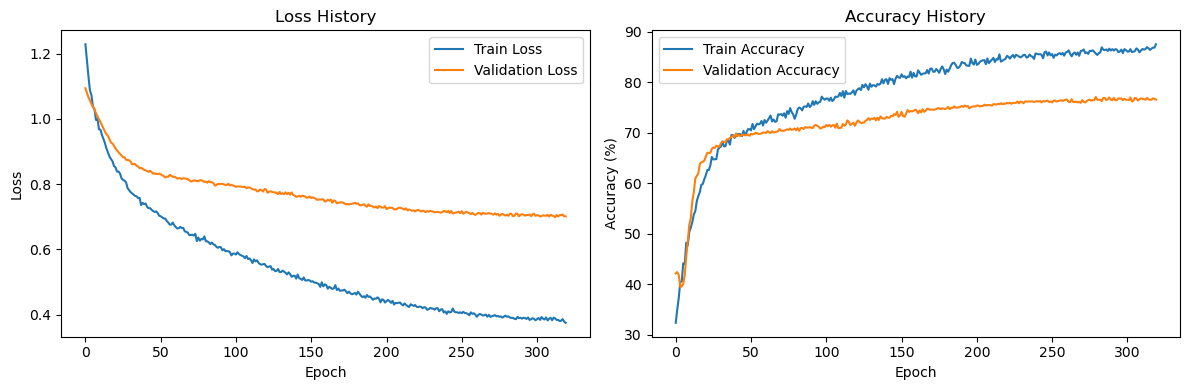

0
Early stopping at epoch 60


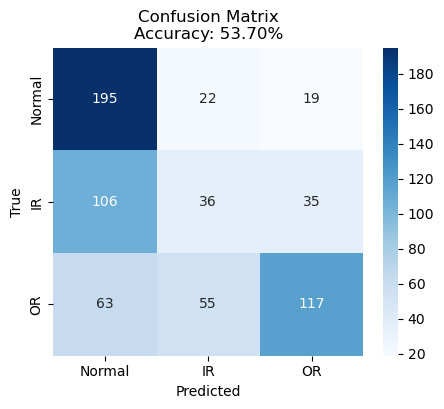

 - Model accuracy: 53.70%


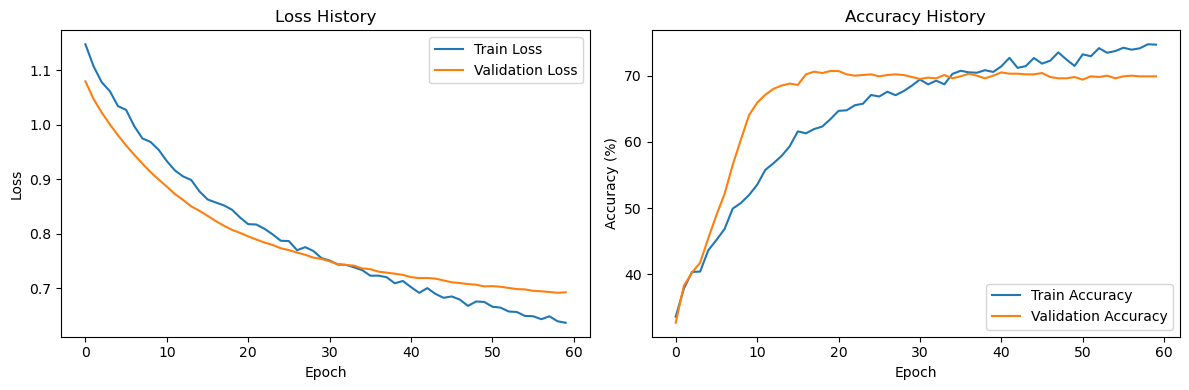

0
Early stopping at epoch 343


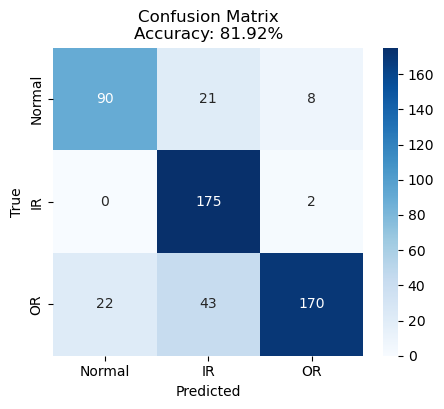

 - Model accuracy: 81.92%


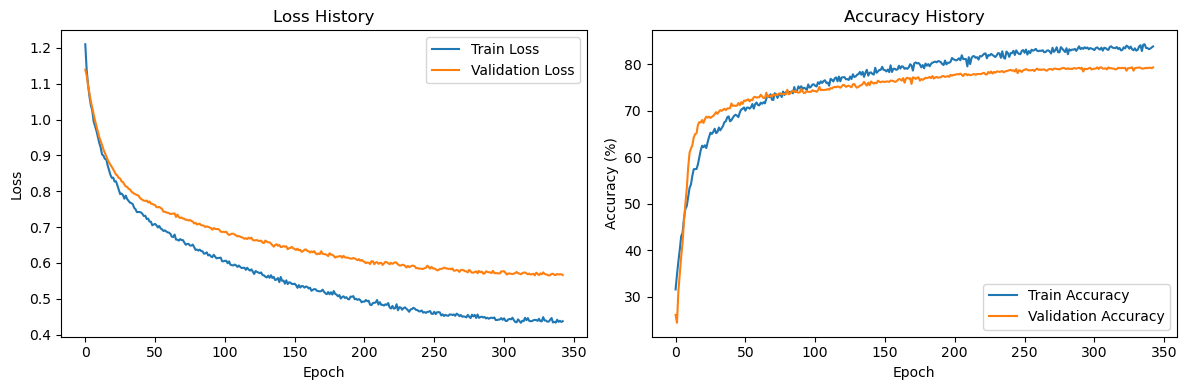

0
Early stopping at epoch 336


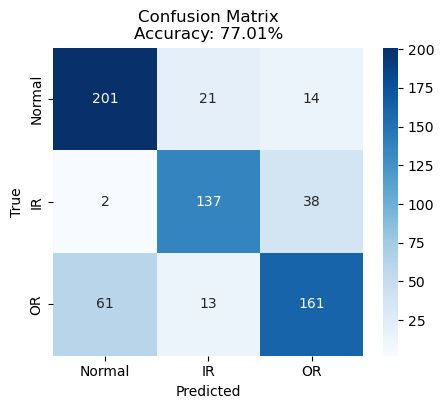

 - Model accuracy: 77.01%


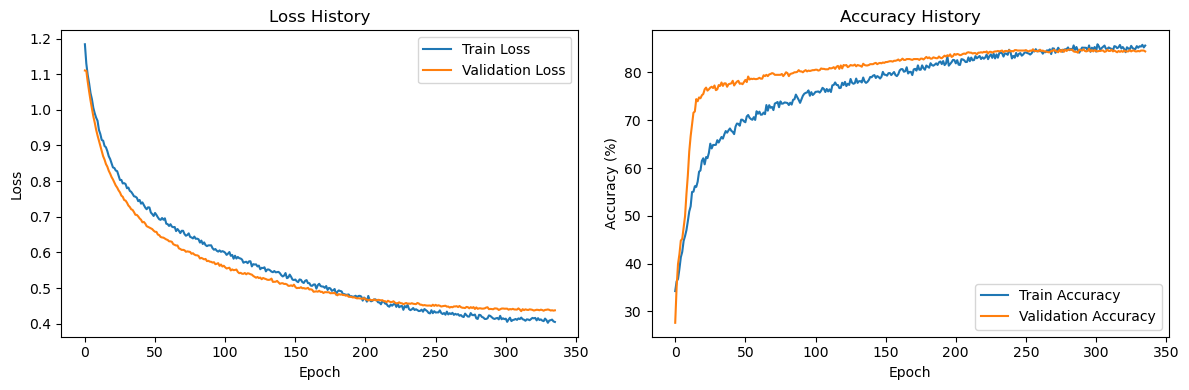

0
Early stopping at epoch 340


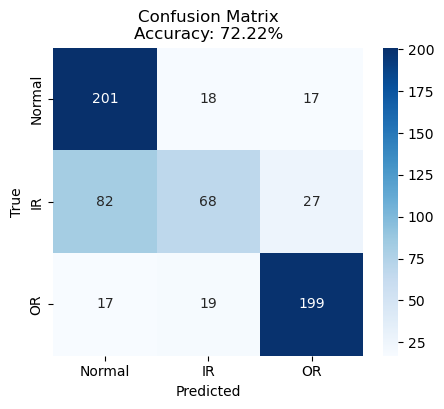

 - Model accuracy: 72.22%


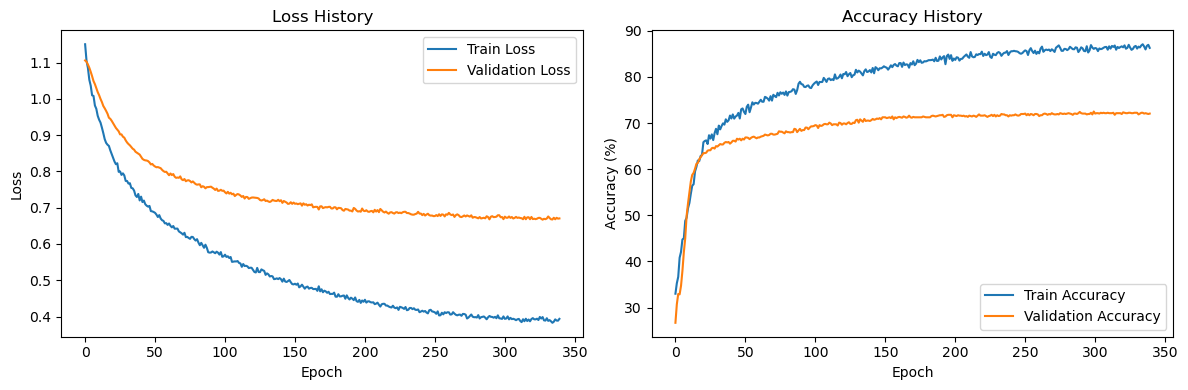

0
Early stopping at epoch 321


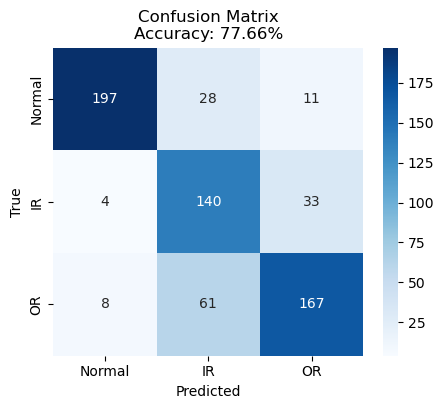

 - Model accuracy: 77.66%


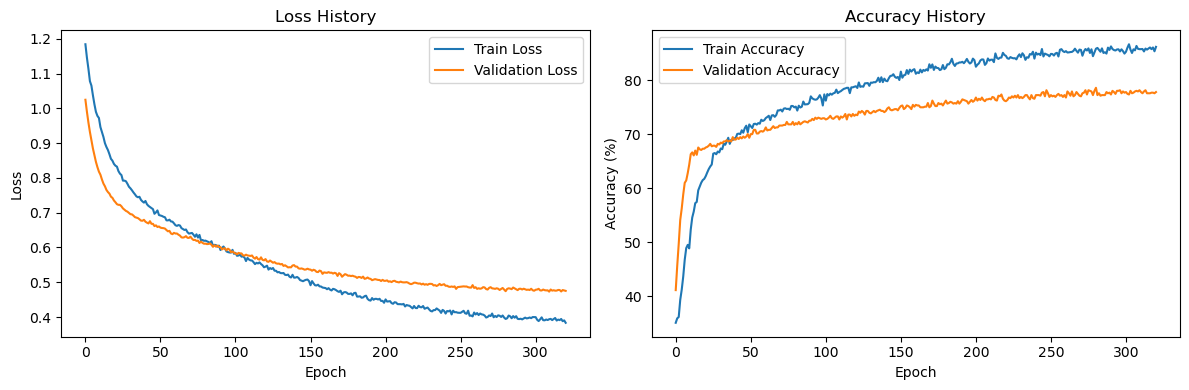

0
Early stopping at epoch 124


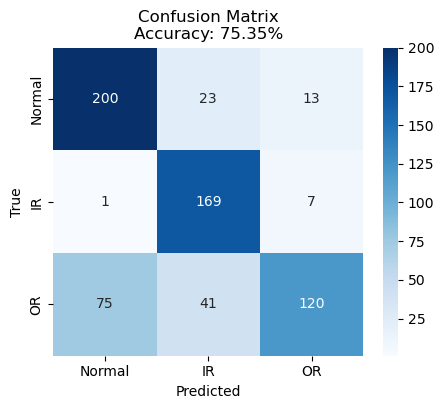

 - Model accuracy: 75.35%


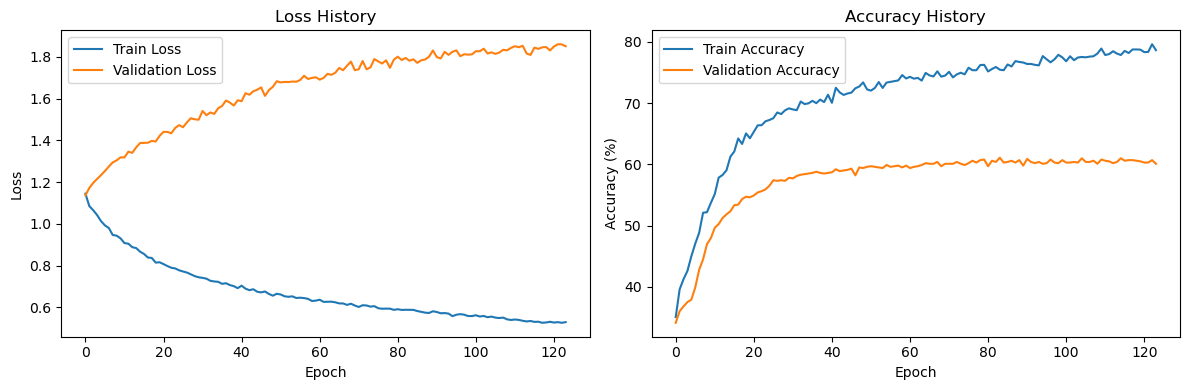

0
Early stopping at epoch 285


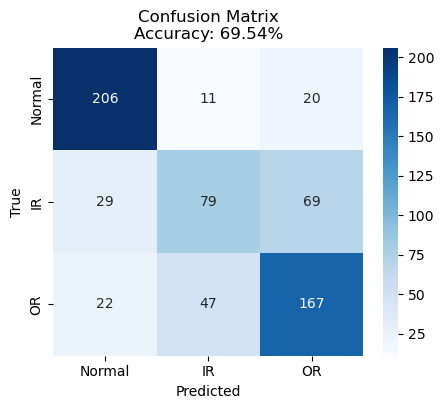

 - Model accuracy: 69.54%


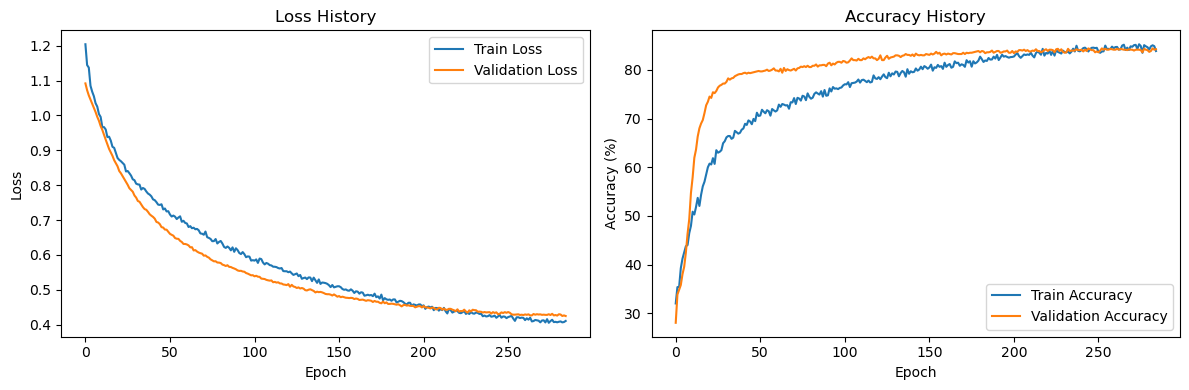

0
Early stopping at epoch 57


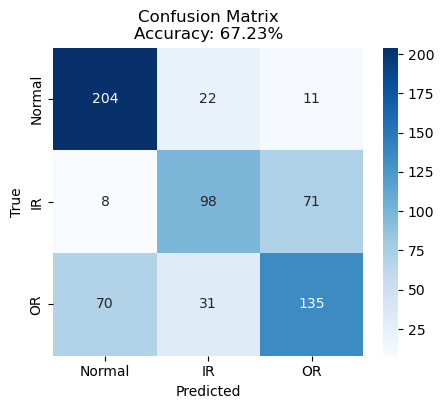

 - Model accuracy: 67.23%


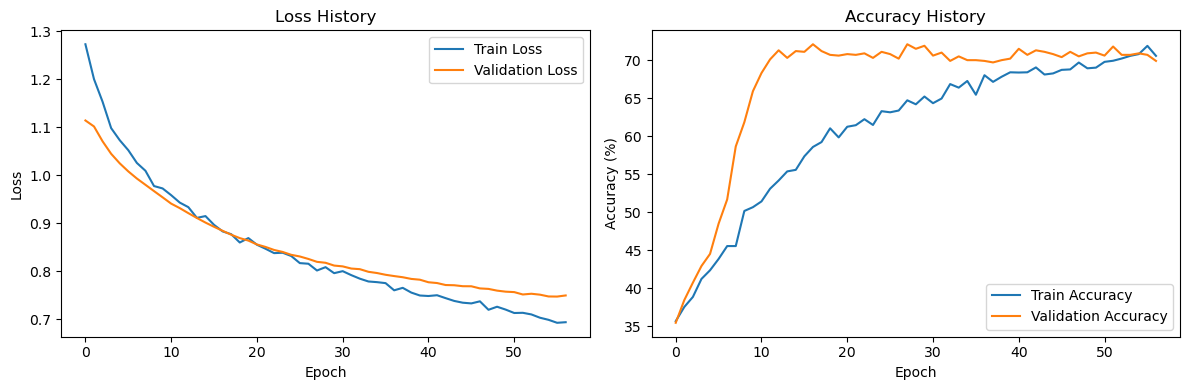

0
Early stopping at epoch 225


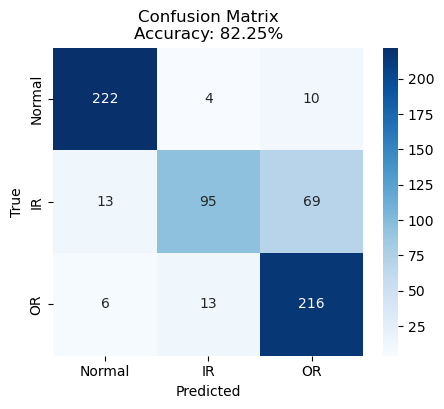

 - Model accuracy: 82.25%


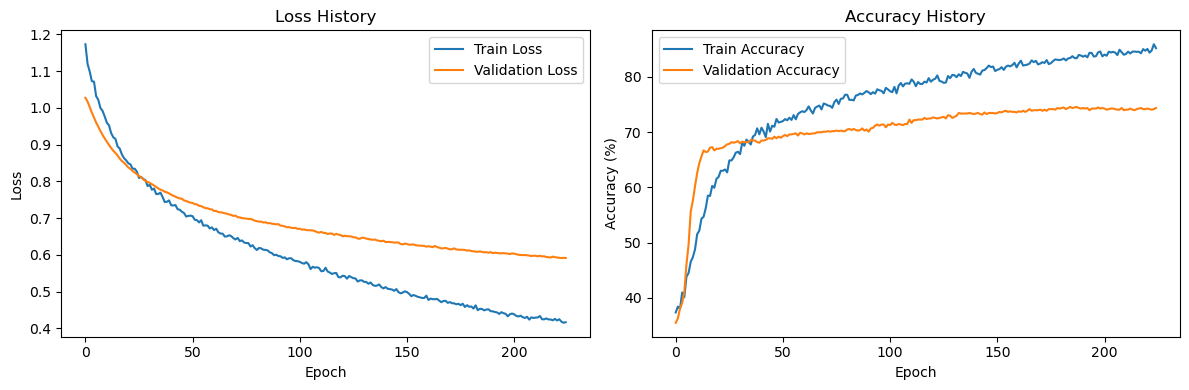

0
Early stopping at epoch 60


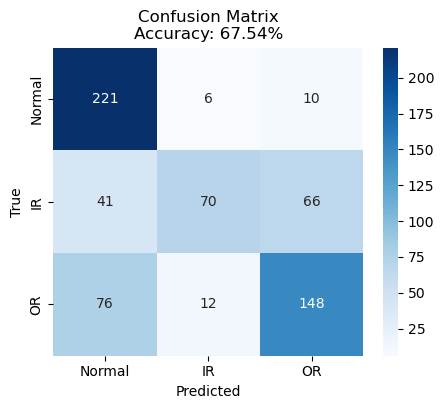

 - Model accuracy: 67.54%


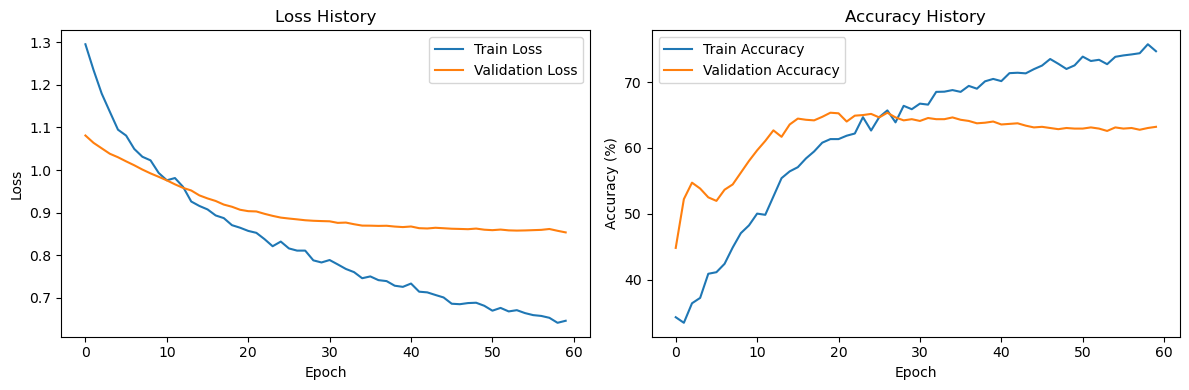

0
Early stopping at epoch 207


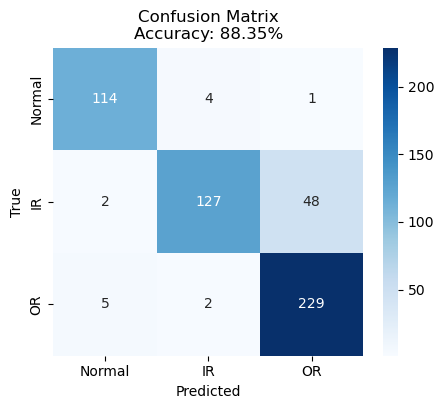

 - Model accuracy: 88.35%


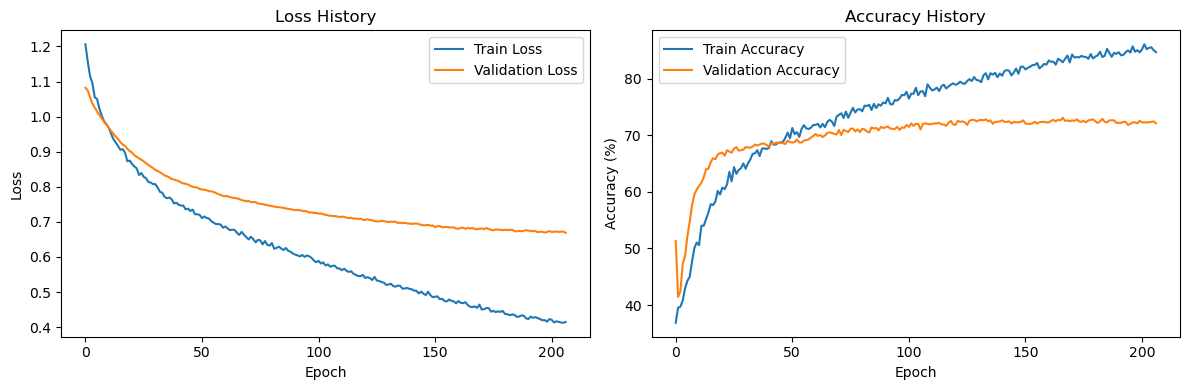

0
Early stopping at epoch 293


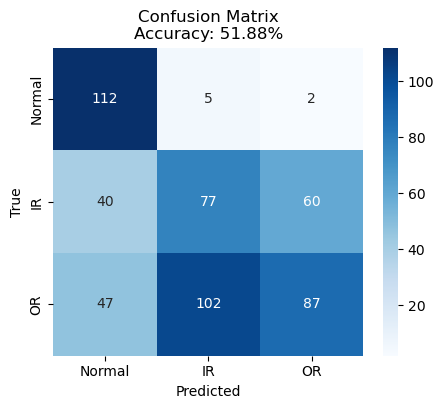

 - Model accuracy: 51.88%


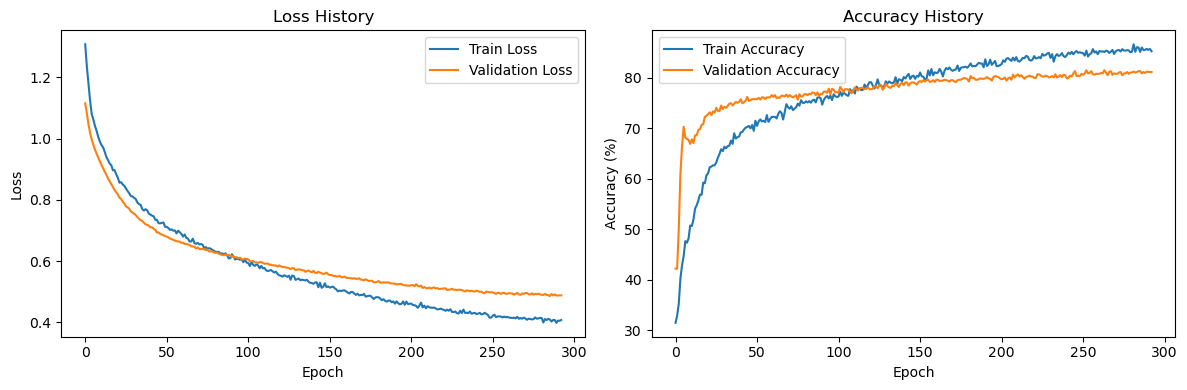

Mean accuracy: 0.7205459437032468
Std accuracy: 0.0966484895842575


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate, preprocessing
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

    scaler = preprocessing.DataScaler(method='robust')
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))